In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode


In [3]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [4]:
data_all = train_data.append(test_data, ignore_index = True)

In [5]:
print(train_data.shape, test_data.shape, data_all.shape)

(8523, 12) (5681, 11) (14204, 12)


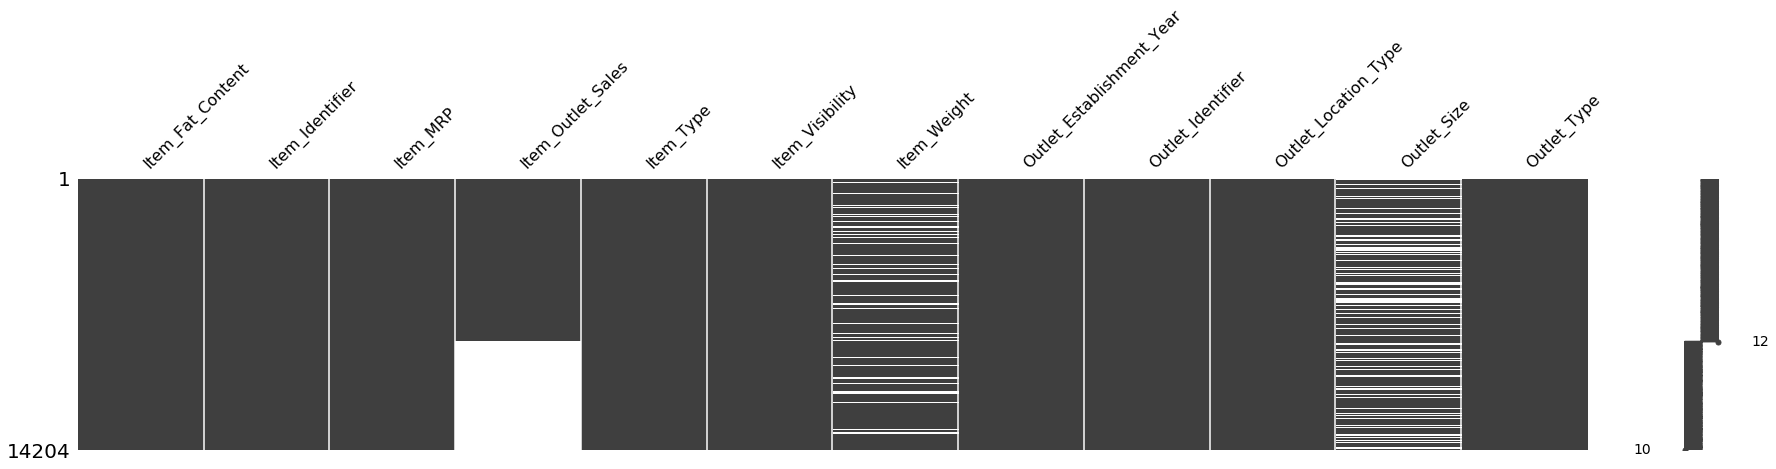

In [6]:
missingno.matrix(data_all, figsize = (30,5))

In [7]:
data_all.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [8]:
data_all.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [9]:
data_all.describe(include=['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204,14204,14204,10188,14204
unique,5,1559,16,10,3,3,4
top,Low Fat,FDA50,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,2013,1559,5583,4655,9294


In [11]:
data_all.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [13]:
data_all['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [14]:
data_all['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
data_all['Item_Fat_Content'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
14174    False
14175    False
14176    False
14177    False
14178    False
14179    False
14180    False
14181    False
14182    False
14183    False
14184    False
14185    False
14186    False
14187    False
14188    False
14189    False
14190    False
14191    False
14192    False
14193    False
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Fat_Content, Length: 14204, dtype: bool

In [16]:
data_all['Item_Fat_Content'].isnull().sum()

0

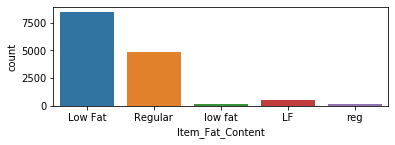

In [18]:
fig = plt.figure()
ax1=fig.add_subplot(2,1,2)
sns.countplot(x= 'Item_Fat_Content', ax = ax1, data = data_all)

In [19]:
data_all['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
data_all['Item_Type'].nunique()

16

In [22]:
data_all['Item_Type'].isnull().sum()

0

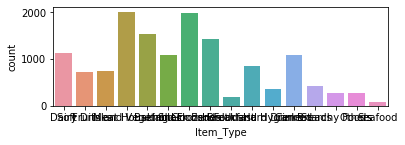

In [23]:
fig = plt.figure()
ax1=fig.add_subplot(2,1,1)
sns.countplot(x='Item_Type', ax=ax1, data=data_all)

In [24]:
data_all['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

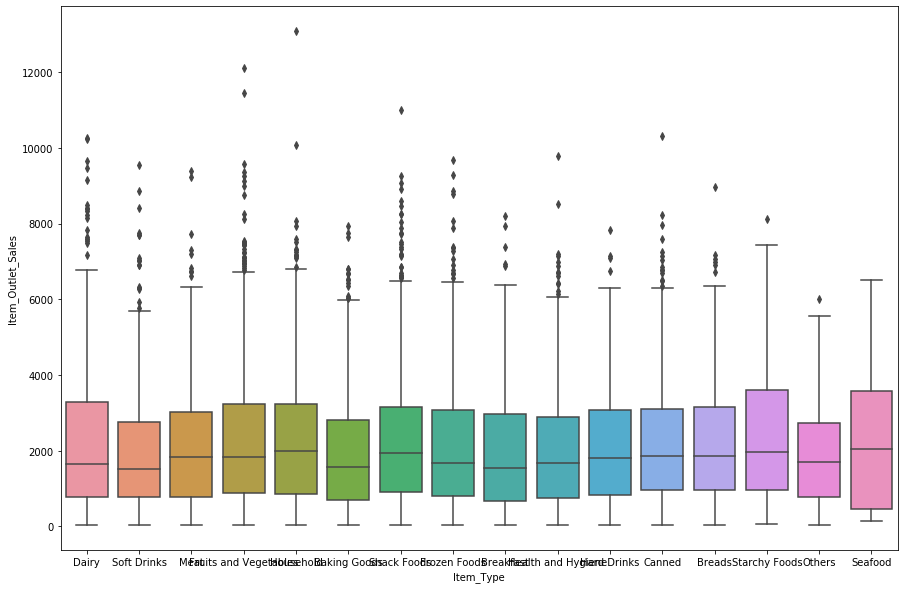

In [29]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = data_all)

In [30]:
data_all['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [31]:
data_all['Outlet_Location_Type'].isnull().sum()

0

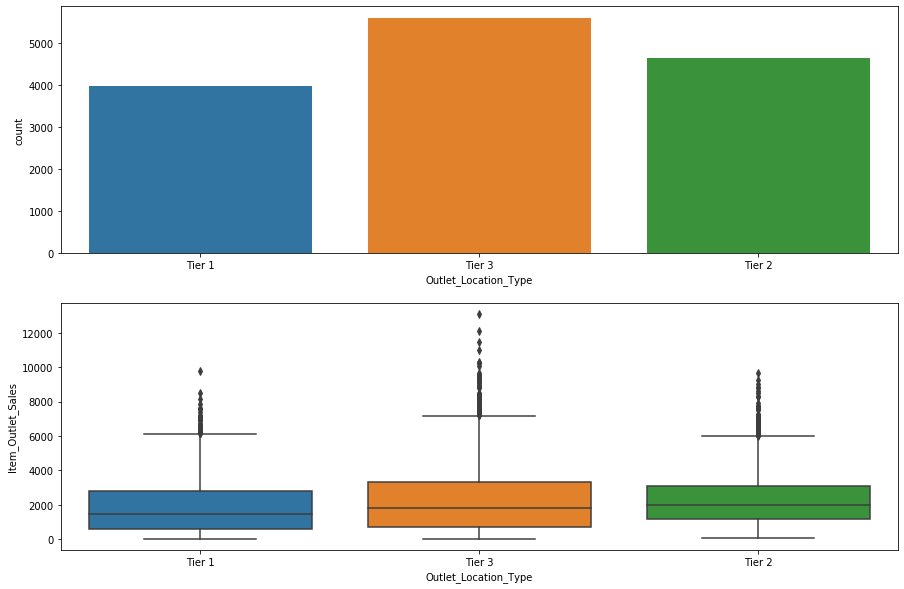

In [32]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(2,1,1)
sns.countplot(x='Outlet_Location_Type', ax =ax1, data=data_all)
ax2=fig.add_subplot(2,1,2)
sns.boxplot(x='Outlet_Location_Type', y = 'Item_Outlet_Sales', data= data_all, ax=ax2)

In [33]:
data_all['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
data_all['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
data_all['Outlet_Size'].isnull().sum()

4016

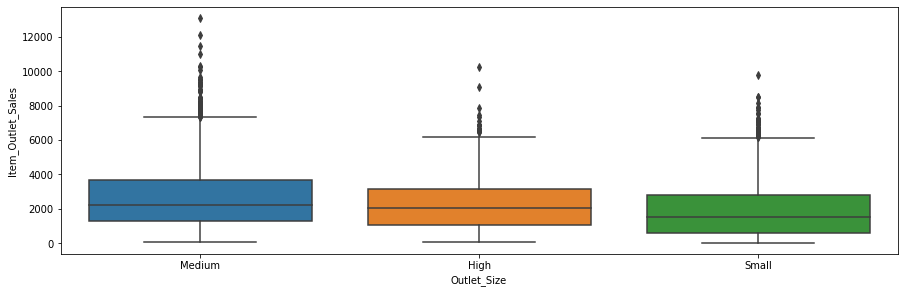

In [42]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,1,1)
sns.boxplot(x='Outlet_Size', y="Item_Outlet_Sales", ax=ax1, data= data_all)

In [44]:
data_all['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [45]:
data_all['Outlet_Type'].nunique()

4

In [46]:
data_all['Outlet_Type'].isnull().sum()

0

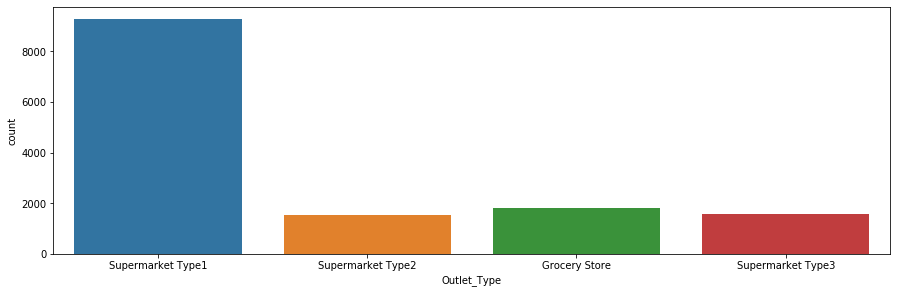

In [47]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,1,1)
sns.countplot(x='Outlet_Type', ax=ax1, data=data_all)

In [53]:
item_avg_weight = data_all.pivot_table(values='Item_Weight', index='Item_Identifier')
miss_bool = data_all['Item_Weight'].isnull()
print("Original missing:{}".format(sum(miss_bool)))
data_all.loc[miss_bool,'Item_Weight'] = data_all.loc[miss_bool,'Item_Identifier'].apply(
    lambda x: item_avg_weight.loc[x].values[0])
print('Final missing:{}'.format(sum(data_all['Item_Weight'].isnull())))

Original missing:2439
Final missing:0


In [54]:
# outlet_size
from scipy.stats import mode
outlet_size_mode = data_all.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", 
                                        aggfunc=(lambda x:mode(x).mode[0]))
print(outlet_size_mode)
miss_bool = data_all["Outlet_Size"].isnull()
print("Original missing value: {}".format(miss_bool))
data_all.loc[miss_bool, 'Outlet_Size'] = data_all.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data_all["Outlet_Size"].isnull()))

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Original missing value: 0        False
1        False
2        False
3         True
4        False
5        False
6        False
7        False
8         True
9         True
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25        True
26       False
27       False
28        True
29       False
         ...  
14174    False
14175     True
14176    False
14177    False
14178    False
14179    False
14180    False
14181    False
14182    False
14183    False
14184    False
14185     True
14186    False
14187    False
14188    False
14189    False
14190    False
14191     True
14192    False
14193     True
14194    False
1

In [56]:
data_all.pivot_table(values="Item_Outlet_Sales", index = "Outlet_Type")

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558
